# DeepChem featurizers

Featurizing the smiles for caffeine [CN1C=NC2=C1C(=O)N(C(=O)N2C)C] as an example using featurizers present in DeepChem.

In [1]:
from rdkit import Chem
import deepchem as dc
import numpy as np

2022-06-17 13:42:32.381885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 13:42:32.381909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## A. Graph Convolution Featurizers

### 1. ConvMolFeaturizer
#### Available parameters:
1. master_atom: bool
2. use_chirality: bool
3. atom_properties: list
4. per_atom_fragmentation: bool

In [51]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
featurizer = dc.feat.ConvMolFeaturizer()
f = featurizer.featurize(caffeine)
print(f)
print(type(f))
print(len(f))

<class 'numpy.ndarray'>
1


### 2. WeaveFeaturizer
#### Available parameters:
1. graph_distance: bool
2. explicit_H: bool
3. use_chirality: bool
4. max_pair_distance: int

In [3]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
featurizer = dc.feat.WeaveFeaturizer()
f = featurizer.featurize(caffeine)
print(f)
print(type(f))
print(len(f))

<class 'numpy.ndarray'>
1


### 3. MolGanFeaturizer 
#### Avaliable parameters:
1. max_atom_count: int (default=9)
2. kekulize: bool
3. bond_lables: list
4. atom_lables: list

In [19]:
# Featurizer:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
molcaffeine = Chem.MolFromSmiles(caffeine)
featurizer = dc.feat.MolGanFeaturizer(max_atom_count=100)
caff = featurizer.featurize(molcaffeine)
print(caff)
print(type(caff))
print(len(caff))

<class 'numpy.ndarray'>
1


In [22]:
# Defeaturizer:
defeaturizer = dc.feat.MolGanFeaturizer(max_atom_count=100)
defeaturizer.defeaturize(caff)
print(decaff)
print(type(decaff))
print(len(decaff))

<class 'numpy.ndarray'>
1


### 4. MolGraphConvFeaturizer
#### Avaliable parameters:
1. use_edges: bool
2. use_chirality: bool
3. use_partial_charge: bool

In [34]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True, use_chirality=True, use_partial_charge=True)
f = featurizer.featurize(caffeine)
print(f)
print(type(f))
print(len(f))
print(f'Node-features: {f[0].num_node_features}')
print(f'Edge-features: {f[0].num_edge_features}')

<class 'numpy.ndarray'>
1
Node-features: 33
Edge-features: 11


### 5. PagtnMolGraphFeaturizer
#### Avaliable parameters:
1. max_length: int (default=5)

In [32]:
from deepchem.feat import PagtnMolGraphFeaturizer

caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
featurizer = PagtnMolGraphFeaturize(max_length=5)
f = featurizer.featurize(caffeine)
print(f)
print(type(f))
print(len(f))
print(f'Node-features: {f[0].num_node_features}')
print(f'Edge-features: {f[0].num_edge_features}')

ImportError: cannot import name 'PagtnMolGraphFeaturizer' from 'deepchem.feat' (/home/administrator/anaconda3/envs/deepchem/lib/python3.10/site-packages/deepchem/feat/__init__.py)

### 6. MATFeaturizer

In [35]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
featurizer = dc.feat.MATFeaturizer()
f = featurizer.featurize(caffeine)
print(f)
print(type(f))
print(len(f))

AttributeError: module 'deepchem.feat' has no attribute 'MATFeaturizer'

### 7. OneHotFeaturizer

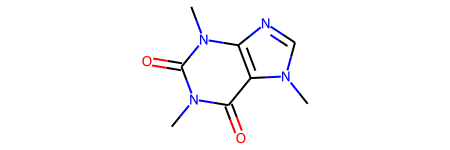

In [68]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
caffmol = Chem.MolFromSmiles(caffeine)
caffmol

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

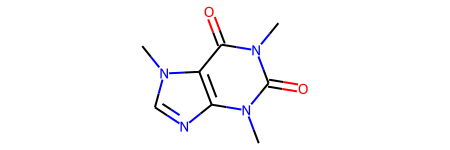

In [70]:
featurizer = dc.feat.OneHotFeaturizer()
f = featurizer.featurize(caffeine)

import sys
np.set_printoptions(threshold=sys.maxsize)

print(f)
print(type(f))
print(len(f))
print("\n")
print("Untransformed feature:")
unfeat = featurizer.untransform(f[0])
print(unfeat)
mol = Chem.MolFromSmiles(unfeat)
mol